# NO Service Calls in 2017 exploration file

This notebook is for exploritory purposes.  Looking at service calls from the New Orleans Open Data website

In [9]:
import requests                           # For pulling in data via api portal
import pandas as pd                       # Quick data frame formatting for CSV file
import io                                 # Reading in the CSV directly from a request response 
from matplotlib import pyplot as plt
import seaborn as sb
import shapely


In [2]:
# pulling in the data from the NOLA open data site
# it looks like the csv, json, and geojson are the same link just different extension if I need the other data

web_pull_csv_11 = requests.get('https://data.nola.gov/resource/j7t8-jceh.csv')
web_pull_csv_12 = requests.get('https://data.nola.gov/resource/wqku-yap7.csv')
web_pull_csv_13 = requests.get('https://data.nola.gov/resource/gwr6-erwk.csv')
web_pull_csv_14 = requests.get('https://data.nola.gov/resource/gvs2-k79j.csv')
web_pull_csv_15 = requests.get('https://data.nola.gov/resource/guaz-xkez.csv')
web_pull_csv_16 = requests.get('https://data.nola.gov/resource/ahnh-7f2h.csv')
web_pull_csv_17 = requests.get('https://data.nola.gov/resource/bevf-jgit.csv')

web_pull_csv = web_pull_csv_17 # for now so I can run through things quickly

In [3]:
# This takes the web response from the api, looks at the content and decodes it using io, and loads it into a pandas dataframe
web_pull_cotnent_11 = web_pull_csv_11.content
web_pull_cotnent_12 = web_pull_csv_12.content
web_pull_cotnent_13 = web_pull_csv_13.content
web_pull_cotnent_14 = web_pull_csv_14.content
web_pull_cotnent_15 = web_pull_csv_15.content
web_pull_cotnent_16 = web_pull_csv_16.content
web_pull_cotnent_17 = web_pull_csv_17.content

service_call_data_2011 = pd.read_csv(io.StringIO(web_pull_cotnent_11.decode('utf-8')))
service_call_data_2012 = pd.read_csv(io.StringIO(web_pull_cotnent_12.decode('utf-8')))
service_call_data_2013 = pd.read_csv(io.StringIO(web_pull_cotnent_13.decode('utf-8')))
service_call_data_2014 = pd.read_csv(io.StringIO(web_pull_cotnent_14.decode('utf-8')))
service_call_data_2015 = pd.read_csv(io.StringIO(web_pull_cotnent_15.decode('utf-8')))
service_call_data_2016 = pd.read_csv(io.StringIO(web_pull_cotnent_16.decode('utf-8')))
service_call_data_2017 = pd.read_csv(io.StringIO(web_pull_cotnent_17.decode('utf-8')))

In [4]:
service_call_data_2011['year'] = 2011
service_call_data_2012['year'] = 2012
service_call_data_2013['year'] = 2013
service_call_data_2014['year'] = 2014
service_call_data_2015['year'] = 2015
service_call_data_2016['year'] = 2016
service_call_data_2017['year'] = 2017

In [5]:
sc = pd.concat([
    service_call_data_2011,
    service_call_data_2012,
    service_call_data_2013,
    service_call_data_2014,
    service_call_data_2015,
    service_call_data_2016,
    service_call_data_2017,
])

C:\Users\mwats\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


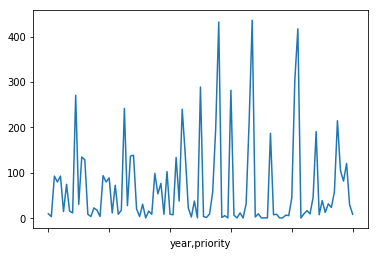

In [6]:
BY_YR = sc.groupby(['year','priority'])
BY_YR['year'].count().plot()
plt.show()

In [7]:
sc.describe()

,:@computed_region_7fw3_kdpf,:@computed_region_evki_aju8,:@computed_region_ewbu_t8bu,:@computed_region_k37d_then,:@computed_region_m56f_hbma,:@computed_region_sikx_bdeb,:@computed_region_spev_d8jm,:@computed_region_u4yh_3wk9,location_address,location_city,location_state,location_zip,mapx,mapy,policedistrict,year,zip
count,2699.000000,2699.000000,2697.000000,2699.000000,2586.000000,2586.000000,2778.000000,2622.000000,0.0,0.0,0.0,0.0,7.000000e+03,7.000000e+03,7000.000000,7000.000000,6234.000000
mean,37.374213,4.551315,6837.976641,2.936643,106.790023,108.022815,3795.825414,6837.297864,NaN,NaN,NaN,NaN,2.342452e+07,2.278573e+06,3.869286,2014.000000,70120.588226
std,22.117116,2.278403,3857.743447,1.312562,78.450578,79.514595,336.955006,3849.063530,NaN,NaN,NaN,NaN,1.665618e+07,1.476395e+06,2.873367,2.000143,6.053375
min,1.000000,1.000000,14.000000,1.000000,2.000000,2.000000,2304.000000,14.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,2011.000000,70112.000000
25%,15.000000,3.000000,3420.000000,2.000000,27.000000,27.000000,3458.000000,3442.000000,NaN,NaN,NaN,NaN,3.683907e+06,5.370610e+05,1.000000,2012.000000,70116.000000
50%,40.000000,5.000000,7055.000000,3.000000,109.000000,109.000000,3768.000000,7048.000000,NaN,NaN,NaN,NaN,3.736900e+07,3.513814e+06,4.000000,2014.000000,70119.000000
75%,57.000000,7.000000,9749.000000,4.000000,181.000000,181.000000,4148.000000,9726.500000,NaN,NaN,NaN,NaN,3.736900e+07,3.513814e+06,7.000000,2016.000000,70126.000000
max,72.000000,8.000000,13900.000000,5.000000,260.000000,260.000000,4155.000000,13900.000000,NaN,NaN,NaN,NaN,3.736900e+07,3.513814e+06,8.000000,2017.000000,70148.000000


In [7]:
pr = sc['priority'].value_counts()


BY_YR[:10].plot(kind='barh',stacked=True)
plt.show()




TypeError: unhashable type: 'slice'

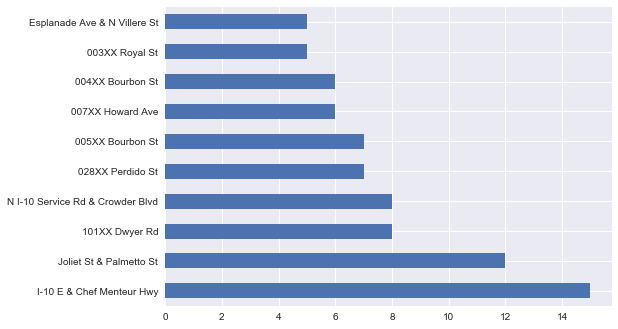

In [9]:

ba = service_call_data_2017['block_address'].value_counts()

#service_call_data_2017['block_address'].hist(bins=10)
ba[:10].plot(kind='barh',rot=0)
plt.show()

In [ ]:


typetext = service_call_data_2017['type_']
xy = typetext.value_counts()

In [ ]:
type(xy)

In [8]:

xy[:10].plot(kind='barh',rot=0)
plt.show()

NameError: name 'xy' is not defined

In [ ]:
k = xy.keys()
y = list(xy)

In [ ]:
k = list(xy[:10].keys())
y = list(xy[:10].values)
y[8]

In [ ]:
plt.bar(range(len(y)),y)
plt.show()